In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [20]:
df_RF = pd.read_excel("HospitalDatabase .xlsx",sheet_name = "ReAdmissionRegistry")
df_RF


,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN


In [21]:
#15 Replace all the null values in ReadmissionFlag with 0
df_RF["ReadmissionFlag"].fillna(0,inplace = True)
df_RF

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,0.0,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,0.0,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,0.0,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,0.0,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,0.0,NaN,NaN


In [72]:
df_RF = pd.read_excel("HospitalDatabase .xlsx",sheet_name = "AmbulatoryVisits")
df_RF

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
0,202,840,29,2019-03-19,2019-03-13 07:59:24.000,10,Physical,188.0,144.143427,83.044920,No Show
1,436,820,25,2019-03-19,2019-02-24 07:10:31.043,3,Follow Up,179.0,118.876808,90.309544,No Show
2,794,879,30,2019-04-02,2019-03-19 01:41:55.656,11,Telemedicine,133.0,98.749563,80.859776,No Show
3,799,884,37,2019-03-03,2019-02-25 01:25:39.696,4,Telemedicine,132.0,98.001270,82.184737,No Show
4,515,32,26,2019-03-16,2019-02-20 06:44:59.617,11,Telemedicine,131.0,85.115632,89.192362,No Show
...,...,...,...,...,...,...,...,...,...,...,...
945,788,873,1,2019-03-27,2019-03-10 17:19:48.264,5,Telemedicine,187.0,126.695141,70.049167,Canceled
946,703,855,36,2019-03-12,2019-02-19 02:27:52.664,10,Follow Up,182.0,140.703502,73.380812,Canceled
947,481,865,13,2019-05-03,2019-04-25 13:37:57.501,12,New,150.0,84.841197,61.625454,Canceled
948,398,635,10,2019-02-09,2019-02-08 11:40:35.137,1,Physical,177.0,125.037534,53.287036,Canceled


In [74]:
#14 Find the number of null values in Blood PressureSystolic column.
df_RF.isnull().sum()

VisitID                     0
PatientMRN                  0
ProviderID                  0
DateofVisit                 0
DateScheduled               0
VisitDepartmentID           0
VisitType                   0
BloodPressureSystolic     124
BloodPressureDiastolic    124
Pulse                     124
VisitStatus                 0
dtype: int64

In [59]:
import numpy as np

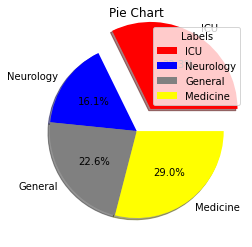

In [119]:
#11 Create a pie chart by taking Service= ["ICU", "Neurology", "General", "Medicine"] & ExpectedLOS=[10,5,7,9] & explode the wedge with highest LOS.
y = np.array([10,5,7,9])
mylabels = ["ICU", "Neurology", "General", "Medicine"]
myexplode = [0.3,0,0,0]
c1 = ['Red','blue','grey','yellow']
plt.pie(y,labels = mylabels,explode = myexplode, shadow = True,autopct='%2.1f%%',colors = c1)
plt.title("Pie Chart")
plt.legend(title='Labels')
plt.show()


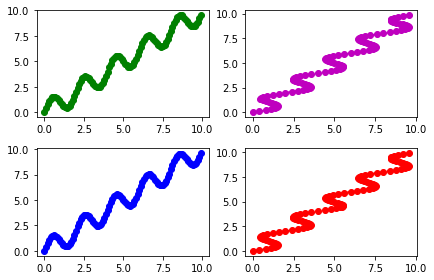

In [78]:
#13 Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach.
x = np.arange(0,10,0.1)

y = np.sin(np.pi*x) + x
  
fig, axes = plt.subplots(2, 2)
  
axes[0, 0].plot(x, y, 'g--o')
axes[0, 1].plot(y, x, 'm--o')
axes[1, 0].plot(x, y, 'b--o')
axes[1, 1].plot(y, x, 'r--o') 
fig.tight_layout()

In [80]:
#32 Write a function to print the multipication table of the given number
def print_table(num): 
    """ This function prints multiplication table of a given number"""
    for i in range(1,11): 
        print(num,' x ', i, ' = ',num*i) 
n = int(input("Please Enter a number to print its multiplication table:"))
print_table(n)

Please Enter a number to print its multiplication table:5
5  x  1  =  5
5  x  2  =  10
5  x  3  =  15
5  x  4  =  20
5  x  5  =  25
5  x  6  =  30
5  x  7  =  35
5  x  8  =  40
5  x  9  =  45
5  x  10  =  50


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

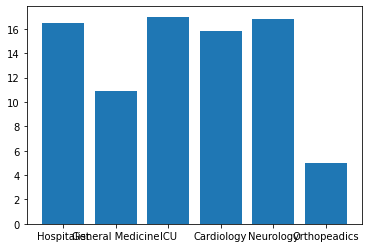

In [8]:
#51 Create a bar chart on service & expected length of stay.
df_D = pd.read_excel("HospitalDatabase .xlsx",sheet_name = "ReAdmissionRegistry")
df_D

x = df_D['Service']
  
y = df_D['ExpectedLOS']
  
plt.bar(x,y)
plt.show()

In [9]:
import numpy as np

In [116]:
a = np.arange(1,31).reshape((6, 5))
print(a)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]


In [105]:
#34 np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.#
a = np.arange(1,31).reshape((6, 5))
a_slice = a[2:4, 0:2]
print(a_slice)

[[11 12]
 [16 17]]


In [117]:
#35 np.arange(1,31).reshape(6,5), find array slicing for elements 2,8,14,20.
a = np.arange(1,31).reshape((6, 5))
a = np.diag(a,1)
print(a)

[ 2  8 14 20]
